In [57]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

data_path = "/Users/alina/Documents/midterm/data"
data = {}

for file in files:
      if file.endswith(".csv"):
        ticker = file.replace(".csv", "")
        df = pd.read_csv(os.path.join(data_path, file))
        df["Date"] = pd.to_datetime(df["Date"])
        df.set_index("Date", inplace=True)
        df.sort_index(inplace=True)
        data[ticker] = df


In [59]:
# 1
for ticker, df in data.items():
    if (df["High"] == df["Low"]).any():
        print(f"{ticker}: +")


In [60]:
# 2
for ticker, df in data.items():
    print(f"{ticker}: max High = {df['High'].max()}, min High = {df['High'].min()}")

ADM: max High = 92.56, min High = 27.316
GNRC: max High = 524.31, min High = 34.72
MTCH: max High = 182.0, min High = 15.276
BK: max High = 59.076, min High = 24.974


In [61]:
#3
for ticker, df in data.items():
    df["LogReturn"] = np.log(df["Close"] / df["Close"].shift(1))
    ret = df["LogReturn"].dropna()
    print(f"{ticker}:")
    print("min=", ret.min())
    print("max=", ret.max())
    print("mean=", ret.mean())
    print("std =", ret.std())
    print("skew=", ret.skew())  



ADM:
min= -0.10610505707091684
max= 0.09774651722384387
mean= 0.0005757204251651185
std = 0.016542184540481678
skew= -0.5536434879950761
GNRC:
min= -0.29225004584113506
max= 0.1341997633603155
mean= 0.0005801911702282557
std = 0.02826656141806342
skew= -0.7663729910069639
MTCH:
min= -0.24965301283142302
max= 0.21643731003412636
mean= 0.0006113026878287672
std = 0.03157118776195417
skew= -0.07904041196112989
BK:
min= -0.15670209214158015
max= 0.1451257395559916
mean= 6.604164592600584e-05
std = 0.018766775665854663
skew= -0.45955062800389784


In [62]:
#4
for ticker, df in data.items():
    log_ret = df["LogReturn"].dropna()
    second_high = log_ret.idxmax() 
    second_low = log_ret.idxmin()  
    print(f"{ticker}:х-{second_high}, y-{second_low}")


ADM:х-2020-03-24 00:00:00, y-2020-03-12 00:00:00
GNRC:х-2022-02-16 00:00:00, y-2022-10-19 00:00:00
MTCH:х-2019-08-07 00:00:00, y-2018-05-01 00:00:00
BK:х-2020-03-13 00:00:00, y-2020-03-16 00:00:00


In [63]:
#5
for ticker, df in data.items():
    weekly_volume = df["Volume"].resample("W").sum()
    print(f"{ticker},: median calendar weekly volume = {weekly_volume.median()}")


ADM,: median calendar weekly volume = 14411200.0
GNRC,: median calendar weekly volume = 2860100.0
MTCH,: median calendar weekly volume = 9947900.0
BK,: median calendar weekly volume = 23697700.0


In [64]:
#6
total_returns = {}
for ticker, df in data.items():
    total_return = df["Close"].iloc[-1] / df["Close"].iloc[0] - 1
    total_returns[ticker] = total_return

lowest_company = min(total_returns, key=total_returns.get)
print(f"lowest: {lowest_company} ({total_returns[lowest_company] * 100:.2f}%)")


lowest: BK (10.48%)


In [65]:
for ticker, df in data.items():
    q1 = df["Volume"].quantile(1/3)
    q2 = df["Volume"].quantile(2/3)

    def classify_volume(v):
        if v <= q1:
            return "Low"
        elif v <= q2:
            return "Medium"
        else:
            return "High"


    df["volume_class"] = df["Volume"].apply(classify_volume)
    print(f"{ticker}:++")


ADM:++
GNRC:++
MTCH:++
BK:++


In [66]:
for ticker, df in data.items():
    if "LogReturn" not in df.columns:
        df["LogReturn"] = np.log(df["Close"] / df["Close"].shift(1))


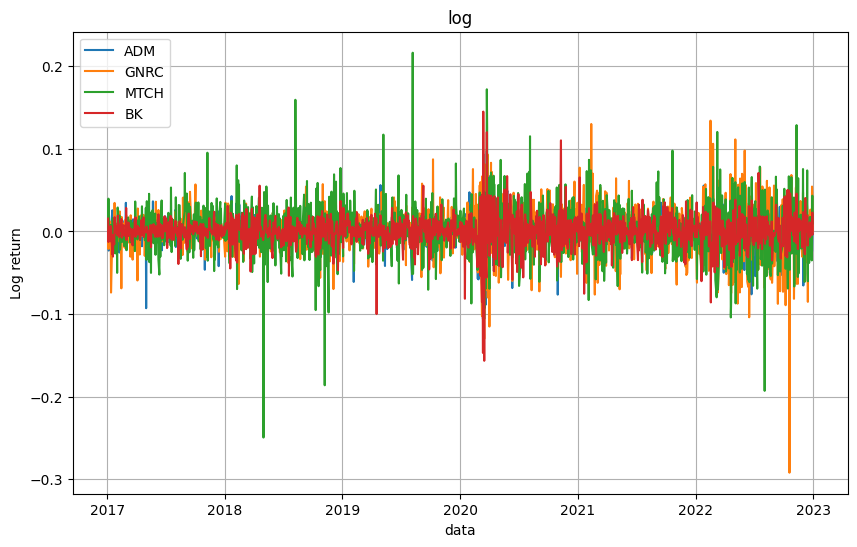

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for ticker, df in data.items():
    plt.plot(df.index, df["LogReturn"], label=ticker)

plt.title("log")
plt.xlabel("data")
plt.ylabel("Log return")
plt.legend()
plt.grid(True)
plt.show()


In [90]:
import requests
from bs4 import BeautifulSoup
import csv
df = pd.read_csv('https://ies-fsv.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv', sep=';')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 245, saw 2
